<a href="https://colab.research.google.com/github/Dmitriy6655/Sem_8-Reshaushie-derev-ya/blob/main/Sem_8_Reshaushie_derev'ya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ДЗ_08**


**Что нужно сделать**

Решите задачу классификации оттоковых клиентов телекома: для каждого клиента необходимо определить, перестанет он пользоваться услугами оператора в ближайшее время или нет.


In [11]:
import pandas as pd
import numpy as np

df = pd.read_csv("telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False




Сделайте первичную обработку данных:

* Выбросите колонку State.

* Колонки International plan и Voice mail plan закодируйте следующим образом: Yes замените на 1, а No на 0.

* Переведите целевую переменную (Churn) в числа: True в 1, а False в 0.



In [12]:
df = df.drop('State', axis=1)
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].astype(int)

Выведите на экран первые строки изменённой таблицы, чтобы проверить, что все преобразования сработали.

In [13]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [14]:
#Создайте матрицу объект-признак X и вектор с целевой переменной (Churn) y
X = df.drop('Churn', axis=1)
y = df['Churn']


In [15]:
#Проверьте баланс классов. Является ли выборка сбалансированной?
class_counts = y.value_counts()
print(class_counts)
print(f"Процент положительных классов: {class_counts[1] / len(y) * 100:.2f}%")
print(f"Процент отрицательных классов: {class_counts[0] / len(y) * 100:.2f}%")


Churn
0    2850
1     483
Name: count, dtype: int64
Процент положительных классов: 14.49%
Процент отрицательных классов: 85.51%




**Вывод:** Сильный перекос в сторону отрицательного класса


Разбейте данные на тренировочную и тестовую части, размер тестовой части — 30%.


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Для линейных моделей очень важно масштабирование признаков. Поэтому отмасштабируйте признаки при помощи StandardScaler, обучив метод на тренировочных данных и применив его и к трейну, и к тесту.

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


После масштабирования признаков X_train и X_test перестали быть объектами типа pd.DataFrame, это неудобно. Приведите их снова к pd.DataFrame.

In [18]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)



Обучите на тренировочных данных с параметрами по умолчанию:

* логистическую регрессию;

* метод опорных векторов (с kernel='linear').



In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Логистическая регрессия
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Метод опорных векторов
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, y_train)


SVC(kernel='linear')

С помощью обученных моделей сделайте предсказание на тестовых данных.

In [80]:
from sklearn.metrics import roc_auc_score

# Предсказание для логистической регрессии
y_pred_logreg_proba = logreg.predict_proba(X_test)[:, 1]

# Предсказание для SVC
y_pred_svc_score = svc_linear.decision_function(X_test)

# Вычисление ROC AUC для логистической регрессии
roc_auc_logreg = roc_auc_score(y_test, y_pred_logreg_proba)
print(f"ROC AUC для логистической регрессии: {roc_auc_logreg:.4f}")

# Вычисление ROC AUC для SVC
roc_auc_svc = roc_auc_score(y_test, y_pred_svc_score)
print(f"ROC AUC для SVC с линейным ядром: {roc_auc_svc:.4f}")

ROC AUC для логистической регрессии: 0.8282
ROC AUC для SVC с линейным ядром: 0.7402





Теперь обучите решающее дерево с параметрами по умолчанию на тренировочных данных, сделайте предсказание на тесте. Используйте метрику для оценки.


In [93]:
from sklearn.tree import DecisionTreeClassifier

# Обучение решающего дерева
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_tree = tree.predict_proba(X_test)[:, 1]

# Вычисление ROC AUC для решающего дерева
roc_auc_tree = roc_auc_score(y_test, y_pred_tree)
print(f"ROC AUC для решающего дерева: {roc_auc_tree:.4f}")


ROC AUC для решающего дерева: 0.8391


Нужно ли масшабировать признаки для обучения решающего дерева? Проверьте это, заново разбив данные на тренировочную и тестовую части (назовите новые полученные объекты новыми названиями), и проведите обучение, предсказание и оценку метрики до масштабирования и после.

In [88]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение решающего дерева без масштабирования
tree_no_scaling = DecisionTreeClassifier()
tree_no_scaling.fit(X_train_new, y_train_new)

# Предсказание на тестовых данных без масштабирования
y_pred_tree_no_scaling = tree_no_scaling.predict_proba(X_test_new)[:, 1]

# Вычисление ROC AUC для решающего дерева без масштабирования
roc_auc_tree_no_scaling = roc_auc_score(y_test_new, y_pred_tree_no_scaling)
print(f"ROC AUC для решающего дерева без масштабирования: {roc_auc_tree_no_scaling:.4f}")


ROC AUC для решающего дерева без масштабирования: 0.8374


In [94]:
# Оценка качества моделей с помощью метрик
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Логистическая регрессия:")
print("Accuracy:",accuracy_score(y_test, y_pred_logreg.round()))
print("Recall:", recall_score(y_test, y_pred_logreg.round()))
print("Precision:", precision_score(y_test, y_pred_logreg.round()))
print("F1-score:", f1_score(y_test, y_pred_logreg.round()))

print("\nSVC:")
print("Accuracy:", accuracy_score(y_test, y_pred_svc.round()))
print("Recall:", recall_score(y_test, y_pred_svc.round(), pos_label='positive',
                                           average='micro'))
print("Precision:", precision_score(y_test, y_pred_svc.round(), pos_label='positive',
                                           average='micro'))
print("F1-score:", f1_score(y_test, y_pred_svc.round(), pos_label='positive',
                                           average='micro'))

print("\nРешающее дерево:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree.round()))
print("Recall:", recall_score(y_test, y_pred_tree.round()))
print("Precision:", precision_score(y_test, y_pred_tree.round()))
print("F1-score:", f1_score(y_test, y_pred_tree.round()))

Логистическая регрессия:
Accuracy: 0.862
Recall: 0.2097902097902098
Precision: 0.5454545454545454
F1-score: 0.30303030303030304

SVC:
Accuracy: 0.0
Recall: 0.0
Precision: 0.0
F1-score: 0.0

Решающее дерево:
Accuracy: 0.914
Recall: 0.7342657342657343
Precision: 0.6862745098039216
F1-score: 0.7094594594594594


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1583: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1583: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1583: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(




**Вывод:**

* решающее дерево показало наилучший результат по метрике ROC AUC.
* после масштабирования, решающее дерево показало результаты немного лучше чем с масштабированием.
* даже без масштабирования, решающее дерево показало результат заметно лучше чем логистическая регрессия и SVC.



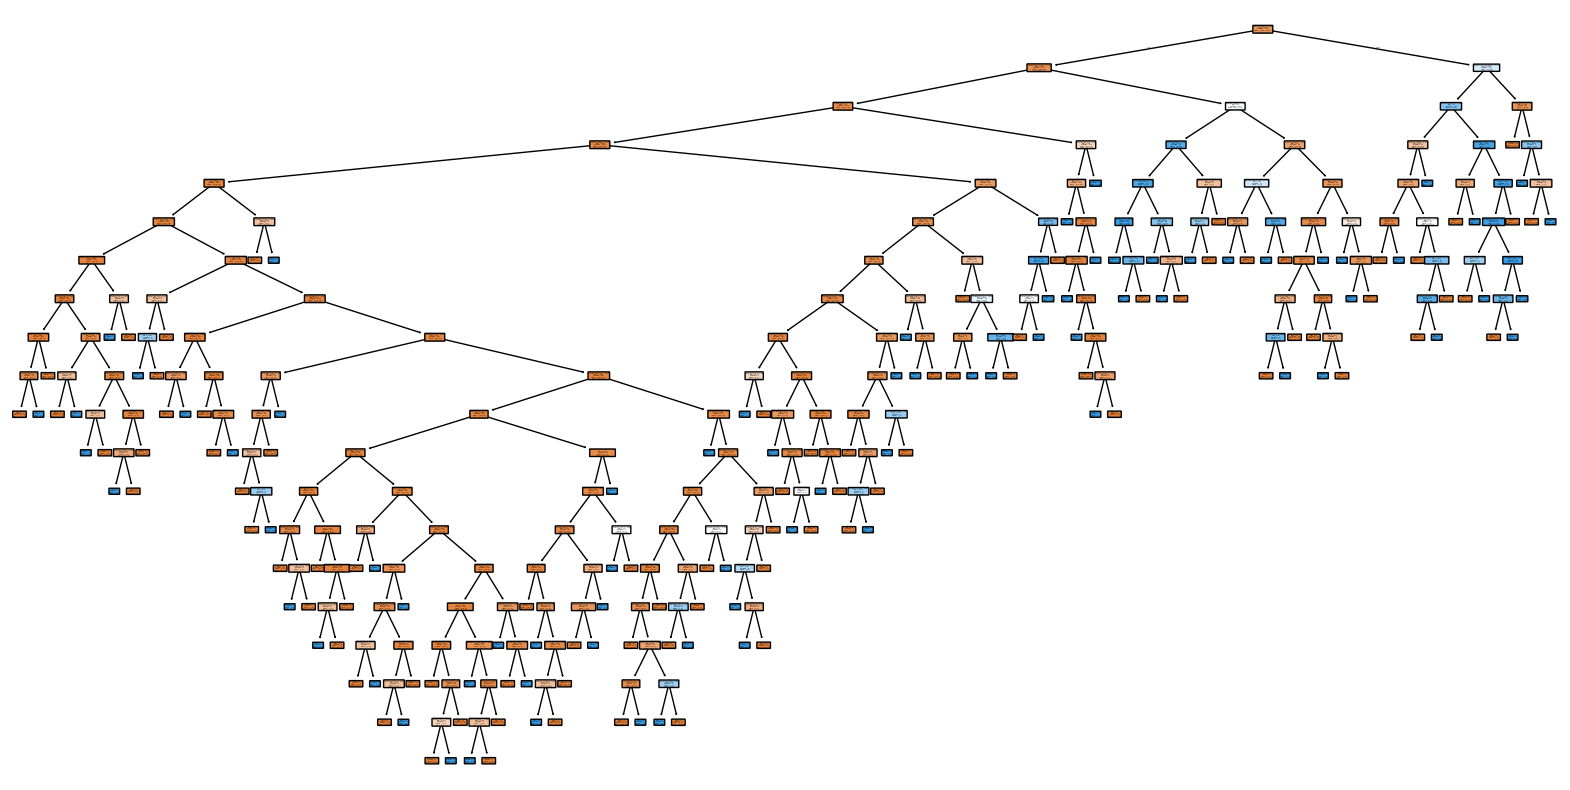

In [95]:
# Визуализация дерева решающего дерева
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['Not Churn', 'Churn'], rounded=True)
plt.show()